In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
N = 1000
X = np.random.random((N,2)) * 6 - 3
y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

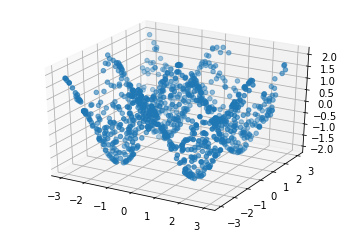

In [9]:
# cos(2x1) + cos(3x2)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y)

In [12]:
# Build the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=(2,),activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [13]:
r = model.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9718
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8546
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8326
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7519
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6224
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5512
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4767
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3381
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2374
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1564
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0919
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0556
Epoch 13/100
32/32 [=================

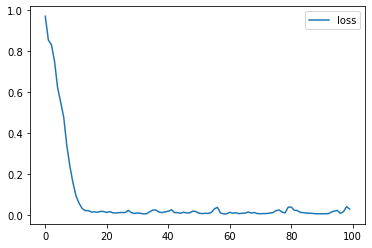

In [17]:
plt.plot(r.history['loss'],label='loss')
plt.legend()

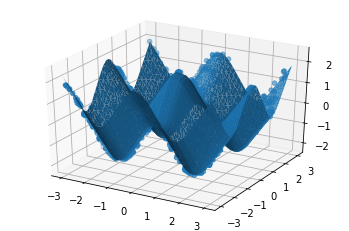

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y)

line = np.linspace(-3,3,50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).transpose()
yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],yhat,linewidth=.2,antialiased = True)
plt.show()